## Dataset: Swedish texts published during 2021 about *COVID-19*

### Analyze Swedish pronoun occurrences in the dataset

**Import Primary Libraries/Packages**

In [19]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

count     2729
unique       8
top       NEWS
freq       857
Name: genre, dtype: object


<ipython-input-20-1f4aff2ae4d1>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  count_rel_df = pd.concat([count_rel_df, pd.DataFrame([counts_rel])], ignore_index=True)


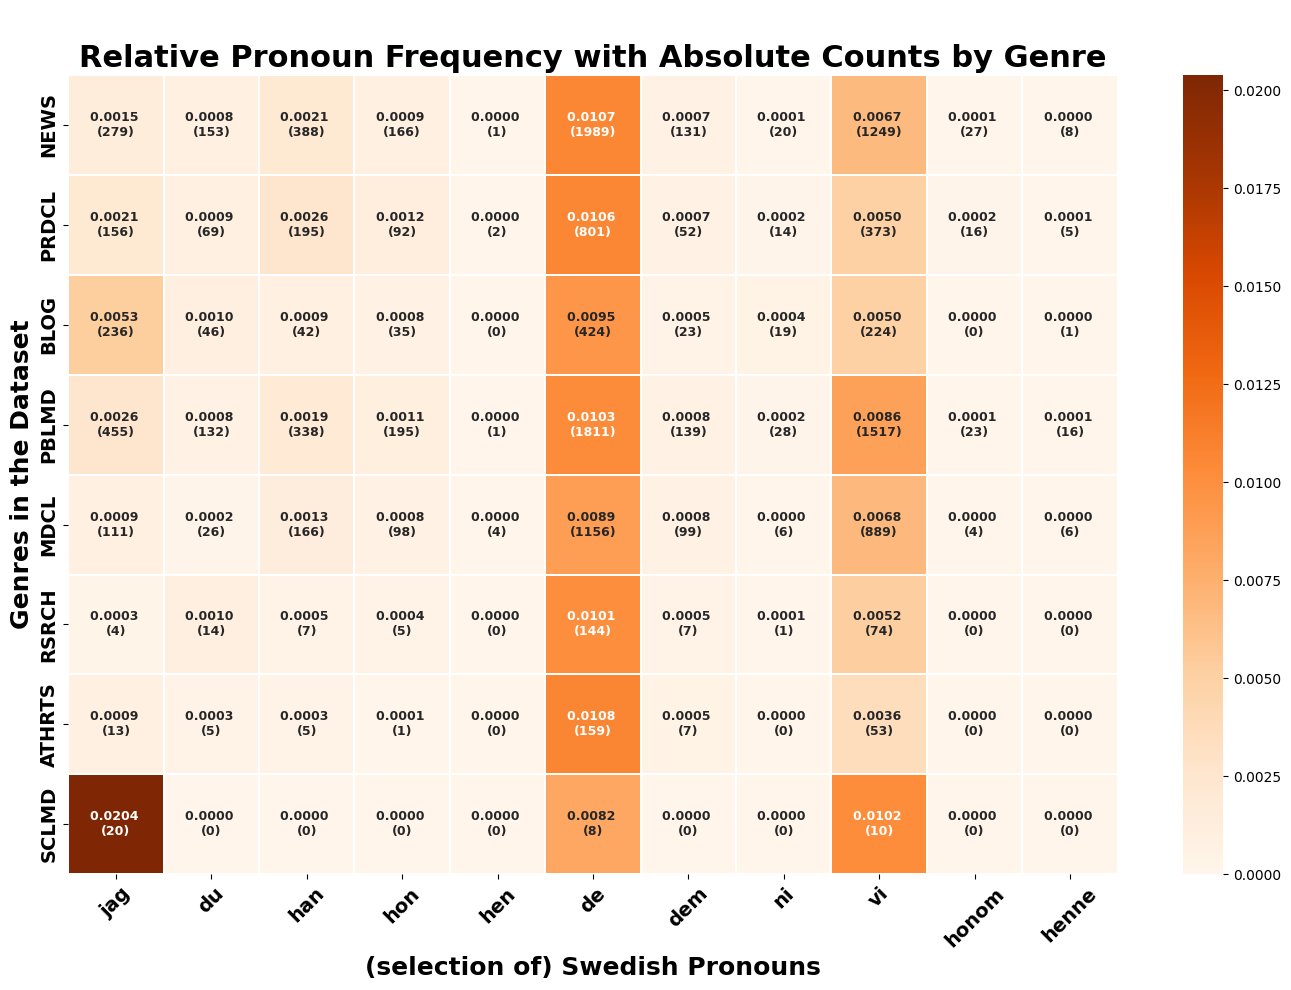

In [20]:
# Step 0: Load the CSV file
url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"
s = requests.get(url).text
df = pd.read_csv(StringIO(s), sep="\t")

print(df['genre'].describe())

# Step 1: Define a set of pronouns
sv_pronouns = ["jag", "du", "han", "hon", "hen", "de", "dem", "ni", "vi","honom","henne"]

# Step 2: Initialize DataFrames for absolute counts and relative frequencies
count_abs_df = pd.DataFrame(columns=['genre'] + sv_pronouns)
count_rel_df = pd.DataFrame(columns=['genre'] + sv_pronouns)

# Step 3: Count occurrences of each pronoun by genre (absolute and relative)
for genre in df['genre'].unique():
    genre_texts = df[df['genre'] == genre]['text']

    # Count total number of words in this genre
    total_words = sum(len(text.split()) for text in genre_texts)

    # Count occurrences of each pronoun (absolute count)
    counts_abs = {pronoun: sum(text.lower().split().count(pronoun) for text in genre_texts) for pronoun in sv_pronouns}
    counts_abs['genre'] = genre

    # Calculate relative frequency of each pronoun
    counts_rel = {pronoun: counts_abs[pronoun] / total_words for pronoun in sv_pronouns}
    counts_rel['genre'] = genre

    # Add the counts to the DataFrames
    count_abs_df = pd.concat([count_abs_df, pd.DataFrame([counts_abs])], ignore_index=True)
    count_rel_df = pd.concat([count_rel_df, pd.DataFrame([counts_rel])], ignore_index=True)

# Step 4: Set genre as index for both DataFrames
count_abs_df.set_index('genre', inplace=True)
count_rel_df.set_index('genre', inplace=True)

# Step 5: Convert all columns to numeric type
count_abs_df = count_abs_df.apply(pd.to_numeric)
count_rel_df = count_rel_df.apply(pd.to_numeric)

# Step 6: Combine absolute counts and relative frequencies into annotation strings
combined_df = pd.DataFrame(index=count_rel_df.index, columns=sv_pronouns)
for pronoun in sv_pronouns:
    combined_df[pronoun] = count_rel_df[pronoun].apply(lambda rel: f"{rel:.4f}") + \
                           count_abs_df[pronoun].apply(lambda abs_: f" \n({int(abs_)})")

# Step 7: Create a heatmap for pronoun relative frequencies (numeric data)
plt.figure(figsize=(14, 10))  # Larger figure size for better readability

# Use the relative frequency DataFrame for the heatmap data
sns.heatmap(count_rel_df, annot=combined_df, fmt='', cmap="Oranges", #https://matplotlib.org/stable/users/explain/colors/colormaps.html
            cbar=True, linewidths=0.3, linecolor='white',
            annot_kws={"size": 9, "weight": "bold"})  # Use combined_df for annotations

# Update font sizes for title, labels, and ticks
plt.title('\nRelative Pronoun Frequency with Absolute Counts by Genre', fontsize=22, fontweight='bold')
plt.xlabel('(selection of) Swedish Pronouns', fontsize=18, fontweight='bold')
plt.ylabel('Genres in the Dataset', fontsize=18, fontweight='bold')

# Adjust the font size of the x-axis and y-axis ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Ensure the layout fits the plot with larger fonts and labels
plt.tight_layout()

# Display the heatmap
plt.show()



---



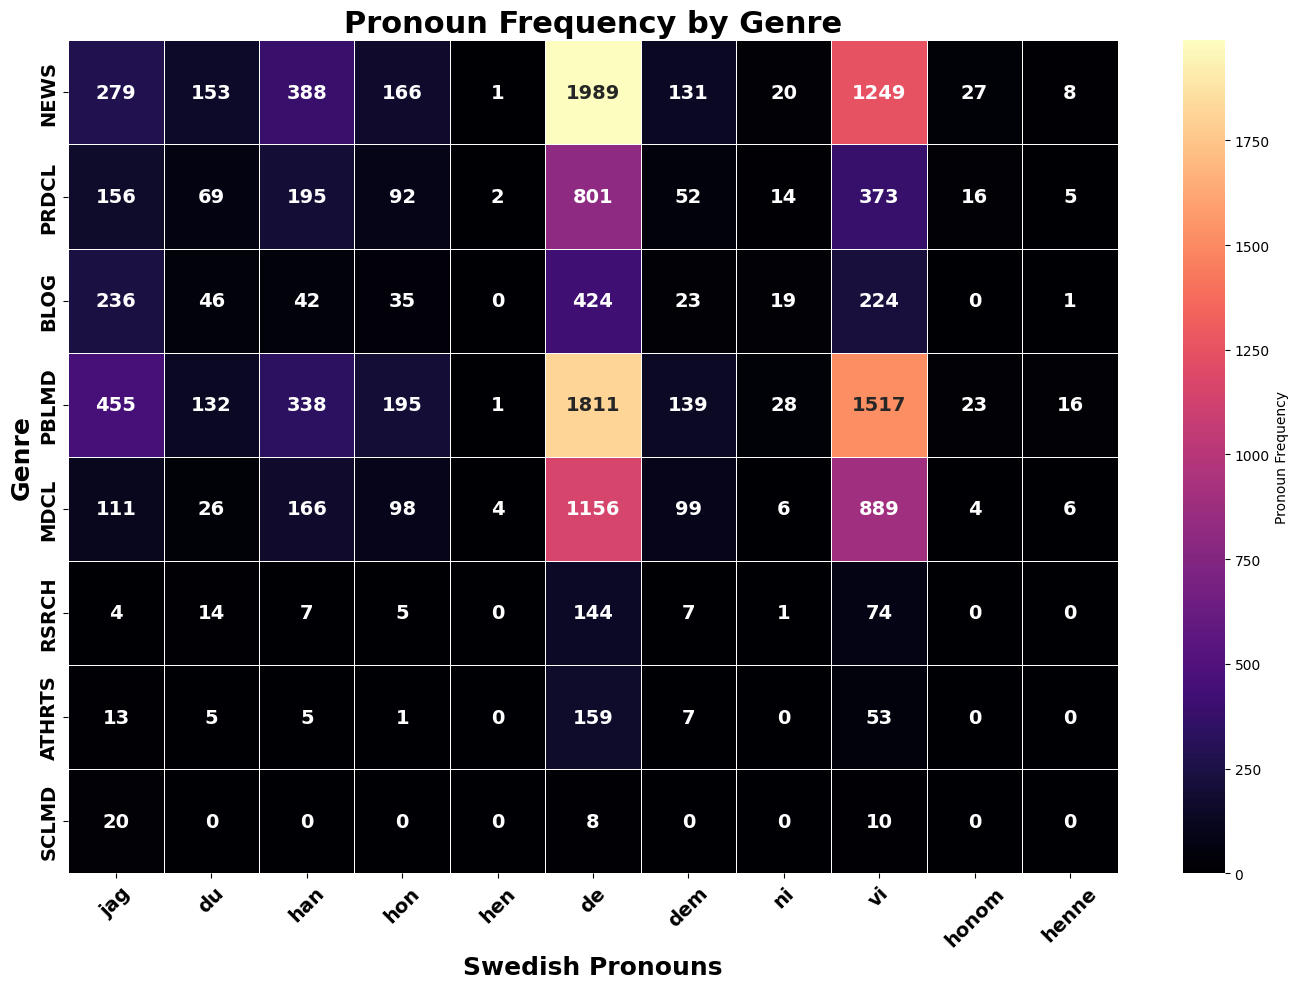

In [21]:
# Step 2: Define a set of pronouns and initialize a DataFrame to count occurrences
#sv_pronouns = ["jag", "du", "han", "hon", "hen", "de", "dem", "ni","vi"]
sv_pronouns = ["jag", "du", "han", "hon", "hen", "de", "dem", "ni", "vi","honom","henne"]

count_df = pd.DataFrame(columns=['genre'] + sv_pronouns)

# Step 3: Count occurrences of each pronoun by genre
for genre in df['genre'].unique():
    genre_texts = df[df['genre'] == genre]['text']

    # Count occurrences of each pronoun
    counts = {pronoun: sum(text.lower().split().count(pronoun) for text in genre_texts) for pronoun in sv_pronouns}
    counts['genre'] = genre

    # Use concat instead of the deprecated append method
    count_df = pd.concat([count_df, pd.DataFrame([counts])], ignore_index=True)

# Step 4: Set genre as index
count_df.set_index('genre', inplace=True)

# Step 5: Convert all columns to numeric type
count_df = count_df.apply(pd.to_numeric)

# Step 6: Create a heatmap for pronoun frequencies across genres
plt.figure(figsize=(14, 10))  # Larger figure size for better readability

# Use the 'magma' colormap for brighter and stronger colors
sns.heatmap(count_df, annot=True, cmap="magma", fmt='d',
            cbar_kws={'label': 'Pronoun Frequency'},
            linewidths=0.5, linecolor='white',
            annot_kws={"size": 14, "weight": "bold"})  # Larger annotations

# Update font sizes for title, labels, and ticks
plt.title('Pronoun Frequency by Genre', fontsize=22, fontweight='bold')
plt.xlabel('Swedish Pronouns', fontsize=18, fontweight='bold')
plt.ylabel('Genre', fontsize=18, fontweight='bold')

# Adjust the font size of the x-axis and y-axis ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Ensure the layout fits the plot with larger fonts and labels
plt.tight_layout()

# Display the heatmap
plt.show()

##Relative frequencies

In [22]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"
s = requests.get(url).text
df = pd.read_csv(StringIO(s), sep="\t")

print(df['genre'].describe())

# Step 2: Define the pronouns and initialize a DataFrame to count occurrences
sv_pronouns = ["jag", "du", "han", "hon", "hen", "de", "dem", "ni","vi"]
count_df = pd.DataFrame(columns=['genre'] + sv_pronouns)

count     2729
unique       8
top       NEWS
freq       857
Name: genre, dtype: object


<ipython-input-23-4b1567fb20dc>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  count_df = pd.concat([count_df, pd.DataFrame([counts])], ignore_index=True)


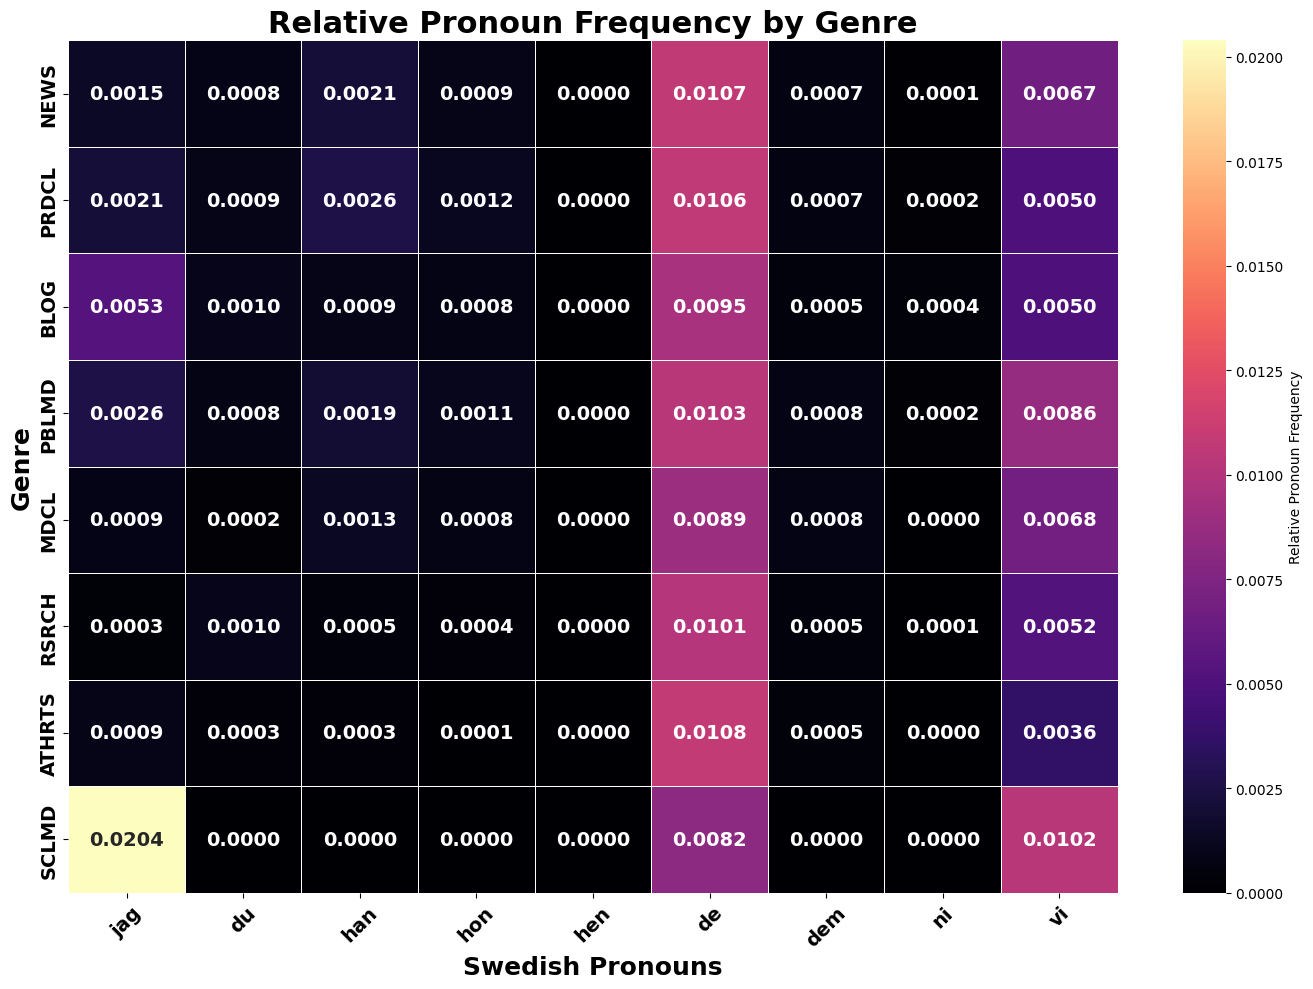

In [23]:
# Step 3: Count occurrences of each pronoun by genre and normalize by total word count
for genre in df['genre'].unique():
    genre_texts = df[df['genre'] == genre]['text']

    # Count the total number of words in this genre
    total_words = sum(len(text.split()) for text in genre_texts)

    # Count occurrences of each pronoun and normalize by total word count
    counts = {pronoun: sum(text.lower().split().count(pronoun) for text in genre_texts) / total_words for pronoun in sv_pronouns}
    counts['genre'] = genre

    # Use concat instead of the deprecated append method
    count_df = pd.concat([count_df, pd.DataFrame([counts])], ignore_index=True)

# Step 4: Set genre as index
count_df.set_index('genre', inplace=True)

# Step 5: Convert all columns to numeric type
count_df = count_df.apply(pd.to_numeric)

# Step 6: Create a heatmap for pronoun relative frequencies across genres
plt.figure(figsize=(14, 10))  # Larger figure size for better readability

# Use the 'magma' colormap for brighter and stronger colors
sns.heatmap(count_df, annot=True, cmap="magma", fmt='.4f',  # Display 4 decimal places for relative frequency
            cbar_kws={'label': 'Relative Pronoun Frequency'},
            linewidths=0.5, linecolor='white',
            annot_kws={"size": 14, "weight": "bold"})  # Larger annotations

# Update font sizes for title, labels, and ticks
plt.title('Relative Pronoun Frequency by Genre', fontsize=22, fontweight='bold')
plt.xlabel('Swedish Pronouns', fontsize=18, fontweight='bold')
plt.ylabel('Genre', fontsize=18, fontweight='bold')

# Adjust the font size of the x-axis and y-axis ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Ensure the layout fits the plot with larger fonts and labels
plt.tight_layout()

# Display the heatmap
plt.show()
